# K-means Cluster

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
X = dataset.iloc[:, [3, 4]].values

In [4]:
m = X.shape[0] # number of training examples
n = X.shape[1] # number of features. n = 2

n_iter = 100

In [5]:
K = 5 # number of clusters considered to be 5
Centroids = np.array([]).reshape(n, 0)

In [6]:
idx = np.random.randint(0, m-1, size=K)
Centroids = X[idx, :]
print(Centroids)

[[42 52]
 [38 35]
 [73 73]
 [76 87]
 [75  5]]


In [7]:
for _ in range(n_iter):
    distance = np.array([]).reshape(m, 0)
    for k in range(K):
        tempDist = np.sum((X-Centroids[k, :])**2, axis=1)
        distance = np.c_[distance, tempDist]

    C = np.argmin(distance, axis=1)+1

    Y = {}
    for k in range(K):
        Y[k+1] = np.array([]).reshape(n, 0)
    for i in range(m):
        Y[C[i]] = np.c_[Y[C[i]], X[i]]

        # Regrouping to nearby centroids
    for k in range(K):
        Y[k+1] = Y[k+1].T

    for k in range(K):
        Centroids[k,:] = np.mean(Y[k+1], axis=0)
    Output = Y

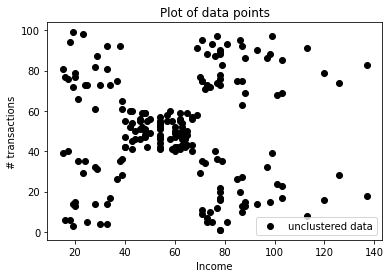

In [8]:
plt.scatter(X[:,0], X[:,1], c='black',label='unclustered data')
plt.xlabel('Income')
plt.ylabel('# transactions')
plt.legend()
plt.title('Plot of data points')
plt.show()

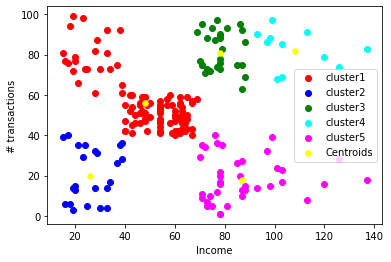

In [9]:
color = ['red', 'blue', 'green', 'cyan', 'magenta']
labels = ['cluster' + str(i+1) for i in range(K)]
for k in range(K):
    plt.scatter(Output[k+1][:,0], Output[k+1][:,1], c=color[k], label=labels[k])
plt.scatter(Centroids[:,0], Centroids[:,1],s=30, c='yellow',label='Centroids')
plt.xlabel('Income')
plt.ylabel('# transactions')
plt.legend()
plt.show()

In [10]:
def Kmeans(X, K, n_iter):
    Centroids = np.array([]).reshape(n, 0)
    idx = np.random.randint(0, m-1, size=K)
    Centroids = X[idx, :]
    for _ in range(n_iter):
        distance = np.array([]).reshape(m, 0)
        for k in range(K):
            tempDist = np.sum((X-Centroids[k, :])**2, axis=1)
            distance = np.c_[distance, tempDist]

        C = np.argmin(distance, axis=1)+1

        Y = {}
        for k in range(K):
            Y[k+1] = np.array([]).reshape(n, 0)
        for i in range(m):
            Y[C[i]] = np.c_[Y[C[i]], X[i]]

            # Regrouping to nearby centroids
        for k in range(K):
            Y[k+1] = Y[k+1].T

        for k in range(K):
            Centroids[k,:] = np.mean(Y[k+1], axis=0)
        Output = Y
    return Output, Centroids

In [11]:
WCSS_array = []
for K in range(1,11):
    Output, Centroids = Kmeans(X,K,n_iter)
    wcss = 0
    for k in range(K):
        wcss += np.sum((Output[k+1] - Centroids[k,:])**2)
    WCSS_array.append(wcss)

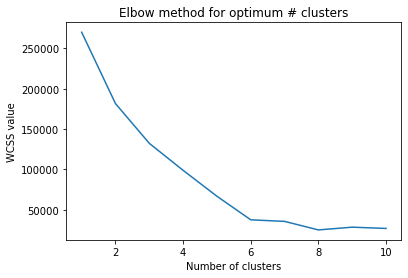

In [12]:
K_array = np.arange(1,11,1)
plt.plot(K_array, WCSS_array)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS value')
plt.title('Elbow method for optimum # clusters')
plt.show()

Optimum number of clusters is 5